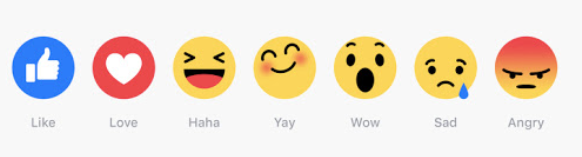

from __future__ import print_function, division
from builtins import range

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score

In [6]:
MAX_SEQUENCE_LENGTH= 100
MAX_VOCAB_SIZE =20000
EMBEDDING_DIM=100
VALIDATION_SPLIT =0.2
BATCH_SIZE =128
EPOCHS =10

In [7]:
#importing word2vec and making a dictionary

In [8]:
word2vec = {}
with open (os.path.join("glove.6B/glove.6B.%sd.txt" % EMBEDDING_DIM))as f:
    for line in f:
        values=line.split()
        word=values[0]
        vec = np.asarray(values[1:], dtype="float32")
        word2vec[word] =vec      

In [9]:
len(word2vec)

400000

In [10]:
#the train Dataset

In [11]:
train = pd.read_csv("train.csv")

In [12]:
train["comment_text"].isna().sum()

0

In [13]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
sentences = train["comment_text"].fillna("NO_COMMENT_EMPTY").values

In [15]:
sentences

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [16]:
sentences.shape

(159571,)

In [21]:
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [22]:
sentences[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [23]:
targets = train[possible_labels].values

In [24]:
targets

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [25]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [26]:
#preprocessing  and tokenizing

In [27]:
from keras.preprocessing.text import Tokenizer

In [28]:
tokenizer= Tokenizer(num_words=MAX_VOCAB_SIZE)

In [29]:
tokenizer.fit_on_texts(sentences)

In [30]:
sequences = tokenizer.texts_to_sequences(sentences)

In [31]:
sequences?

In [32]:
sequences

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985],
 [52,
  2635,
  13,
  555,
  3809,
  73,
  4556,
  2706,
  21,
  94,
  38,
  803,
  2679,
  992,
  589,
  8377,
  182],
 [412,
  437,
  73,
  134,
  14,
  249,
  2,
  71,
  314,
  78,
  50,
  9,
  13,
  626,
  8,
  2284,
  492,
  502,
  102,
  4,
  611,
  2,
  35,
  325,
  126,
  363,
  3,
  29,
  38,
  27,
  52,
  208,
  2,
  434,
  57,
  36,
  1,
  2394,
  93,
  1,
  737,
  468],
 [57,
  7,
  228,
  97,
  54,
  328,
  1436,
  15,
  2133,
  7,
  6024,
  22,
  1,
  123,
  2502,
  56,
  16,
  513,
  15,
  25,
  5,
  4236,
  3,
  1327,
  3,
  9762,
  7,
  67,
  1,
  277,
  85,
  122,
  13503,
  37,
  9,
  51,
  19,
  42,
  10,
  1,
  1460,
  138,
  1257,
  2153,
  426,
 

In [33]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

In [34]:
#understand dimensions of glove

In [35]:
print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))
s = sorted(len(s) for s in sequences)
print("median sequence length:", s[len(s) // 2])

print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))


# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

max sequence length: 1400
min sequence length: 0
median sequence length: 35
max word index: 19999
Found 210337 unique tokens.


In [36]:
#preprocessing the data text

In [37]:
# pad sequences so that we get a N x T matrix
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)

Shape of data tensor: (159571, 100)


In [38]:
data[51]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   96,
       4397,   76,   96,   76,  288,    5, 2863,    9,    6, 1632,  201,
        334,   96,  129,   76,   96, 4397,   76,   73, 4397,   76,  145,
         89], dtype=int32)

In [39]:
#padding

In [40]:
# pad sequences so that we get a N x T matrix
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [41]:
sequences[1]

[52,
 2635,
 13,
 555,
 3809,
 73,
 4556,
 2706,
 21,
 94,
 38,
 803,
 2679,
 992,
 589,
 8377,
 182]

In [42]:
print('Shape of data tensor:', data.shape)
data.shape


Shape of data tensor: (159571, 100)


(159571, 100)

In [43]:
#Creating the Embedding Martix

In [44]:
MAX_VOCAB_SIZE

20000

In [45]:
len(word2idx) + 1

210338

In [46]:
min(MAX_VOCAB_SIZE, len(word2idx) + 1)

20000

In [47]:
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)

In [48]:
EMBEDDING_DIM

100

In [49]:
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

In [50]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
embedding_matrix.shape #V X D (Dimensions)

(20000, 100)

In [54]:
for word, i in word2idx.items():

SyntaxError: unexpected EOF while parsing (<ipython-input-54-e3c9b5db25db>, line 1)

In [55]:
word2vec.get(word)

array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
       -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
        0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
        0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
       -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
       -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
        0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
       -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
        0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
        0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
        0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
        0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
        0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
       -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
        0.2612   ,  0.16854  ,  0.22615  ,  0.62992  , -0.1288

In [56]:
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

In [57]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-1.04809999, -0.32789999, -0.46593001, ..., -0.065447  ,
        -0.13019   ,  0.44433001],
       [ 0.089782  , -0.33164999, -0.85716999, ..., -0.15765999,
        -0.58174002,  0.036233  ],
       [ 0.051446  , -0.43564001,  0.26989001, ...,  0.39087   ,
        -0.14459001, -0.72372001]])

In [58]:
embedding_matrix.shape

(20000, 100)

In [59]:
MAX_SEQUENCE_LENGTH= 100
MAX_VOCAB_SIZE =20000
EMBEDDING_DIM=100
VALIDATION_SPLIT =0.2
BATCH_SIZE =128
EPOCHS =10

In [60]:
embedding_layer = Embedding(
    num_words,
    EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable=False

)

In [64]:
embedding_layer?

In [64]:
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam

In [66]:
input_ =Input(shape=(MAX_SEQUENCE_LENGTH,))

x=embedding_layer(input_)

x= Bidirectional(LSTM(15, return_sequences=True))(x)
x=GlobalMaxPool1D()(x)

output= Dense(len(possible_labels), activation="sigmoid")(x)

model =Model(input_, output)

model.compile(
loss="binary_crossentropy",
optimizer =Adam(lr=0.01),
metrics =["accuracy"]
)



In [67]:
data[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   52, 2635,   13,  555, 3809,
         73, 4556, 2706,   21,   94,   38,  803, 2679,  992,  589, 8377,
        182], dtype=int32)

In [90]:
targets

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [70]:
r = model.fit(
    data,
    targets,
    batch_size= BATCH_SIZE,
    epochs=2,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/2
998/998 [==============================] - 91s 91ms/step - loss: 0.0675 - accuracy: 0.9857 - val_loss: 0.0548 - val_accuracy: 0.9893
Epoch 2/2
998/998 [==============================] - 104s 104ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0531 - val_accuracy: 0.9884


In [99]:
train.loc[train["obscene"]==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \n\nyou obese piece of shit....,1,0,1,0,1,0
159493,fef142420a215b90,FUCKING FAGGOT \n\nLOLWAT.,1,0,1,0,1,0
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0


In [104]:
np.array(data[1])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   52, 2635,   13,  555, 3809,
         73, 4556, 2706,   21,   94,   38,  803, 2679,  992,  589, 8377,
        182], dtype=int32)

In [550]:
#Check Metrics and Loss

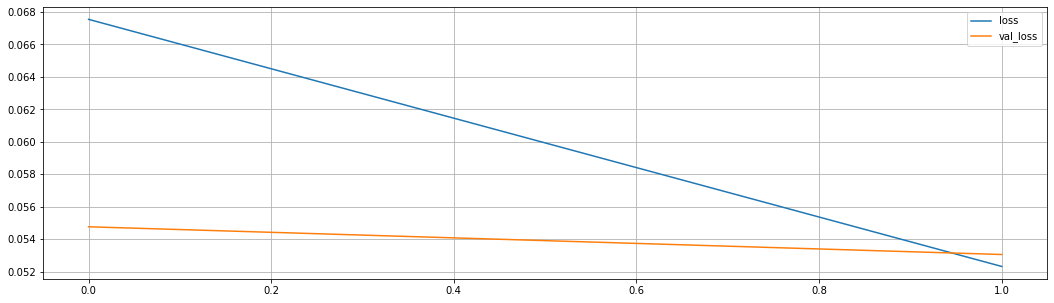

In [71]:
plt.figure(figsize=(18,5))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

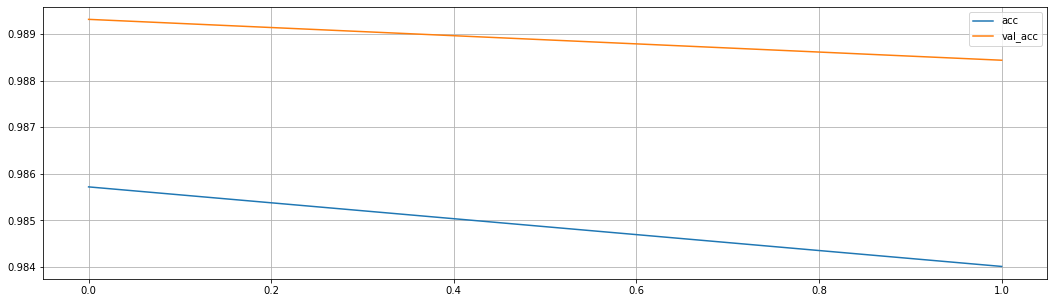

In [72]:
plt.figure(figsize=(18,5))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.grid()
plt.show()


In [139]:
#MAKING PREDICTIONS

In [113]:
data[1].shape

(100,)

In [112]:
data.shape

(159571, 100)

In [76]:
p=model.predict(data)

In [73]:
train["comment_text"][51]

"GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!"

In [74]:
targets[51]

array([1, 0, 1, 0, 0, 0])

In [77]:
p[51].round(4)

array([0.9837, 0.1506, 0.9593, 0.0242, 0.6956, 0.0436], dtype=float32)

In [78]:
model.predict(data[51:52]).round(2)

array([[0.98, 0.15, 0.96, 0.02, 0.7 , 0.04]], dtype=float32)

In [79]:
#making CUSTOM PREDICTIONS

In [80]:
#try a generalised comment from twitter


In [81]:
test_text =["She should not have been allowed to rule on this with the conflict of interest.\
She should have removed herself. Should be a slam dunk appeal on that grounds alone."]

In [82]:
#try something extreme

In [83]:
test_text =["Kill you ,drink, jail, Imagine if your aunt had stayed a federal judge.  But, alas, \
she resigned in order to avoid cut you money rob of her .....wait for it......\
CORRUPTION!!!!"]

In [84]:
test_seq = tokenizer.texts_to_sequences(test_text)

In [85]:
test_seq

[[1026,
  6,
  2863,
  6875,
  1983,
  22,
  20,
  12506,
  99,
  5985,
  5,
  1967,
  2214,
  26,
  6784,
  221,
  8767,
  10,
  501,
  2,
  795,
  1325,
  6,
  1138,
  5393,
  3,
  186,
  1004,
  12,
  11,
  4635]]

In [86]:
len(test_seq)

1

In [87]:
sequences[51]

[96,
 4397,
 76,
 96,
 76,
 288,
 5,
 2863,
 9,
 6,
 1632,
 201,
 334,
 96,
 129,
 76,
 96,
 4397,
 76,
 73,
 4397,
 76,
 145,
 89]

In [88]:
#data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


In [89]:
data[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   52, 2635,   13,  555, 3809,
         73, 4556, 2706,   21,   94,   38,  803, 2679,  992,  589, 8377,
        182], dtype=int32)

In [90]:
test_pad = pad_sequences(test_seq,maxlen=MAX_SEQUENCE_LENGTH)

In [91]:
test_pad.shape

(1, 100)

In [92]:
model.predict(test_pad)[0].round(1)

array([0.7, 0. , 0.1, 0. , 0.2, 0. ], dtype=float32)

In [93]:
toxic=model.predict(test_pad)[0].round(1)


In [94]:
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [95]:
#get the labels

In [96]:
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
for i in range(0,5):
    print(toxic[i] ,possible_labels[i])
    

0.7 toxic
0.0 severe_toxic
0.1 obscene
0.0 threat
0.2 insult
